In [10]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Normalization
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

In [11]:
train_ds= image_dataset_from_directory('dataset/Training', subset='training', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (128,128))

Found 199 files belonging to 2 classes.


Using 180 files for training.


In [12]:
val_ds= image_dataset_from_directory('dataset/Training', subset='validation', seed = 12,
                                       validation_split = 0.1, batch_size=32,
                                       image_size = (128,128))

Found 199 files belonging to 2 classes.
Using 19 files for validation.


In [13]:
test_ds= image_dataset_from_directory('dataset/Testing', seed = 12,
                                       batch_size=32,
                                       image_size = (128,128))

Found 44 files belonging to 2 classes.


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

In [112]:
vgg16_net= VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
vgg16_net.trainable = False

In [114]:
model = Sequential()
model.add(Normalization(input_shape=(128,128,3)))
model.add(vgg16_net)
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))


In [115]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 128, 128, 3)    │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,173,193 (73.14 MB)

 Trainable params: 4,458,498 (17.01 MB)

 Non-trainable params: 14,714,695 (56.13 MB)

In [110]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15) 

Epoch 1/15


InaccessibleTensorError: <tf.Tensor 'sequential_3/normalization_3/Reshape:0' shape=(1, 1, 1, 3) dtype=float32> is out of scope and cannot be used here. Use return values, explicit Python locals or TensorFlow collections to access it.
Please see https://www.tensorflow.org/guide/function#all_outputs_of_a_tffunction_must_be_return_values for more information.

<tf.Tensor 'sequential_3/normalization_3/Reshape:0' shape=(1, 1, 1, 3) dtype=float32> was defined here:
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1077, in launch_instance
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start
    File "c:\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
    File "c:\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
    File "c:\Python311\Lib\asyncio\events.py", line 80, in _run
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 518, in process_one
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 766, in execute_request
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 429, in do_execute
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes
    File "C:\Users\HOME\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    File "C:\Users\HOME\AppData\Local\Temp\ipykernel_18252\2152828526.py", line 1, in <module>
    File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit
    File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator
    File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data
    File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step
    File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 771, in __call__
    File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 1279, in _maybe_build
    File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 223, in build_wrapper
    File "c:\Python311\Lib\site-packages\keras\src\models\sequential.py", line 183, in build
    File "c:\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 771, in __call__
    File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 1279, in _maybe_build
    File "c:\Python311\Lib\site-packages\keras\src\layers\layer.py", line 223, in build_wrapper
    File "c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\normalization.py", line 185, in build
    File "c:\Python311\Lib\site-packages\keras\src\layers\preprocessing\normalization.py", line 289, in finalize_state
    File "c:\Python311\Lib\site-packages\keras\src\ops\numpy.py", line 4415, in reshape
    File "c:\Python311\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1778, in reshape

The tensor <tf.Tensor 'sequential_3/normalization_3/Reshape:0' shape=(1, 1, 1, 3) dtype=float32> cannot be accessed from FuncGraph(name=one_step_on_iterator, id=1742317681600), because it was defined in FuncGraph(name=one_step_on_data, id=1742315309248), which is out of scope.

In [102]:
model.evaluate(test_ds)[1]

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.5096 - loss: 2016.7676


0.5222222208976746

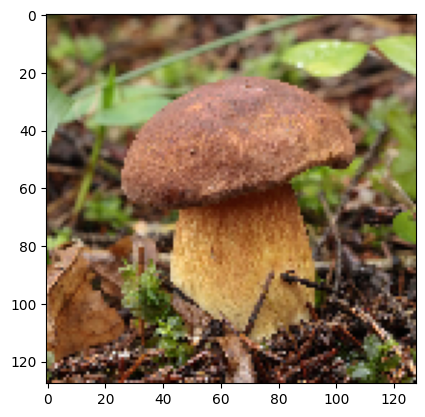

In [106]:
im1 = image.load_img('22.jpg', target_size=(128,128))
plt.imshow(im1)

In [107]:
im1 = image.img_to_array(im1)
im1 = np.expand_dims(im1, axis = 0)
pr = model.predict(im1)
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[1., 0.]], dtype=float32)